<a href="https://colab.research.google.com/github/duytan118/AI/blob/main/fuzzylogic_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9256f4111d3dad7bf4823b8d64d694768d1096a00f2c758c4baf07ff5f8507bb
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
# import thu vien
import numpy as np
import skfuzzy as fuzz

x = np.arange(11) #tao khoang roi rac [0; 10]
mfx = fuzz.trimf(x, [0,5,10])  #tao dang tam giac dua tren x , [0,5,10] la 3 gia tri 3 diem tam giac
print('x = ',x)
print('mfx = ',mfx)


x =  [ 0  1  2  3  4  5  6  7  8  9 10]
mfx =  [0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]


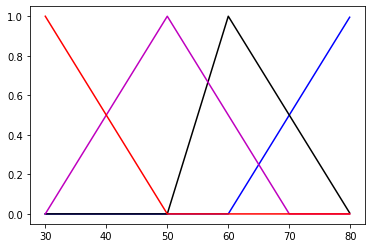

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,0.1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x,full_speed,'b',linewidth = 1.5, label = 'Full Speed')
plt.plot(x,medium_fast,'k',linewidth = 1.5, label = 'Medium Fast')
plt.plot(x,medium,'m',linewidth = 1.5, label = 'Medium Powered')
plt.plot(x,slow,'r',linewidth = 1.5, label = 'Slow')

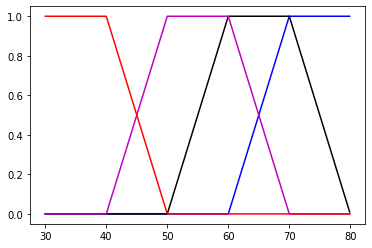

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,0.1)
slow = fuzz.trapmf(x,[30,30,40,50])
medium = fuzz.trapmf(x,[40,50,60,70])
medium_fast = fuzz.trapmf(x,[50,60,70,80])
full_speed = fuzz.trapmf(x,[60,70,80,80])
plt.figure()
plt.plot(x,full_speed,'b',linewidth = 1.5, label = 'Full Speed')
plt.plot(x,medium_fast,'k',linewidth = 1.5, label = 'Medium Fast')
plt.plot(x,medium,'m',linewidth = 1.5, label = 'Medium Powered')
plt.plot(x,slow,'r',linewidth = 1.5, label = 'Slow')

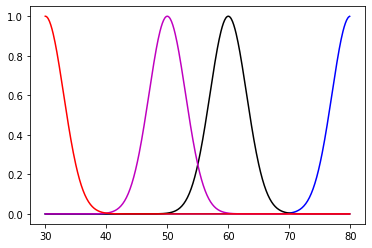

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,0.1)
slow = fuzz.gaussmf(x,30,3) #gaussmf(x,a,c) trong do a la tam, c la phuong sai(tu tam den duong cong)
medium = fuzz.gaussmf(x,50,3)
medium_fast = fuzz.gaussmf(x,60,3)
full_speed = fuzz.gaussmf(x,80,3)
plt.figure()
plt.plot(x,full_speed,'b',linewidth = 1.5, label = 'Full Speed')
plt.plot(x,medium_fast,'k',linewidth = 1.5, label = 'Medium Fast')
plt.plot(x,medium,'m',linewidth = 1.5, label = 'Medium Powered')
plt.plot(x,slow,'r',linewidth = 1.5, label = 'Slow')

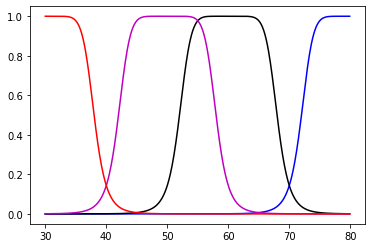

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,0.1)
slow = fuzz.gbellmf(x,8,4,30) #gbellmf(x,b,c,a) trong do b la do rong, c la do doc, a la tam
medium = fuzz.gbellmf(x,8,4,50)
medium_fast = fuzz.gbellmf(x,8,4,60)
full_speed = fuzz.gbellmf(x,8,4,80)
plt.figure()
plt.plot(x,full_speed,'b',linewidth = 1.5, label = 'Full Speed')
plt.plot(x,medium_fast,'k',linewidth = 1.5, label = 'Medium Fast')
plt.plot(x,medium,'m',linewidth = 1.5, label = 'Medium Powered')
plt.plot(x,slow,'r',linewidth = 1.5, label = 'Slow')

19.999999999999996


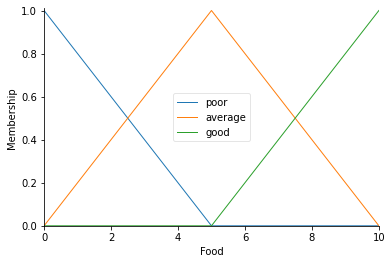

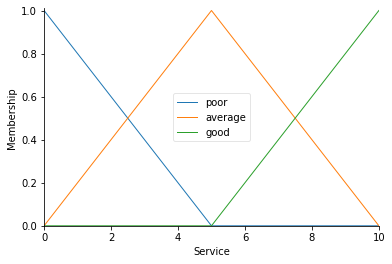

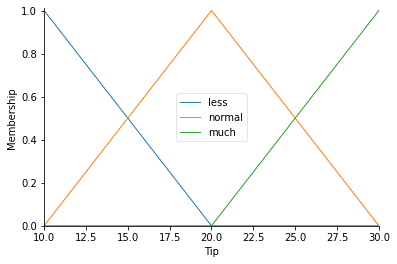

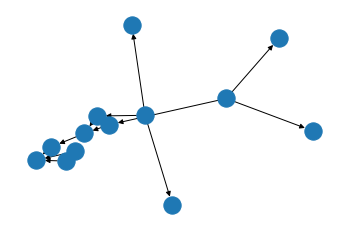

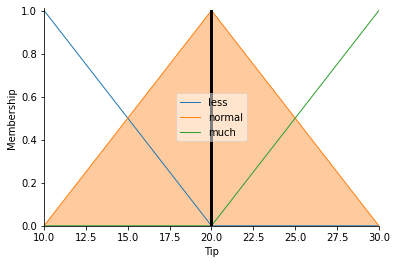

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'Food') #input
service = ctrl.Antecedent(np.arange(0,11,1),'Service') #input
tip = ctrl.Consequent(np.arange(10,31,1),'Tip') #output

# tu dong thi dung ham automf(n) n so input nhan voi nhau
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

rule1.view()

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 5 # gia tri co the thay doi(hoac la doc tu cam bien)
tipping.input['Service'] = 5 # gia tri co the thay doi(hoac la doc tu cam bien)
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim = tipping)







